In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import glob
env_to_label ={
    'Trading-v0': 'Trading',
    'RaceStrategy': 'RaceStrategy',
    'GridworldDiscrete': 'GridworldDiscrete'
}
col = ['c', 'k','orange', 'purple','r', 'b', 'g', 'y','brown','magenta','#BC8D0B',"#006400"]
markers = ['o', 's', 'v', 'D', 'x', '*', '|', '+', '^','2','1','3','4']
LEGEND_FONT_SIZE = 28
AXIS_FONT_SIZE = 28
TICKS_FONT_SIZE = 26
MARKER_SIZE = 10
LINE_WIDTH = 3.0
TITLE_SIZE= 28

figs = []
%matplotlib inline

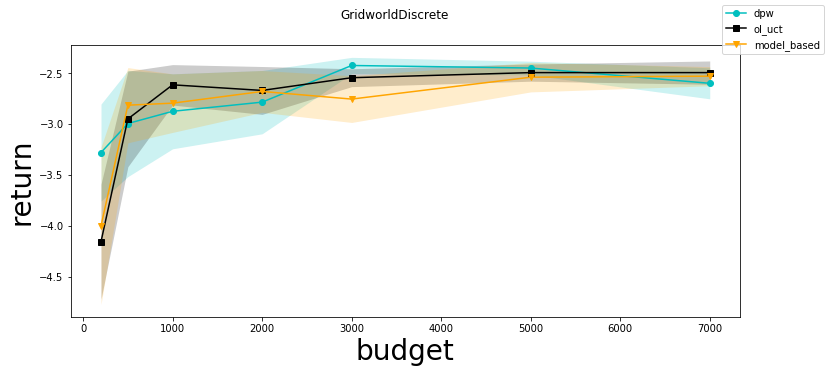

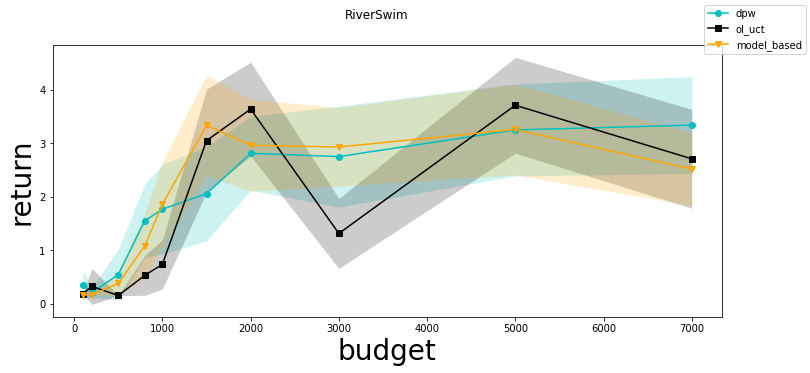

In [3]:
# envs = [ 'Trading-v0',  'Cliff', 'RaceStrategy', 'RiverSwim-continuous',] #'Gridworld', 
budgets = [1000, 5000, 10000, 20000, 35000, 50000, 70000, 85000, 100000]
budgets = [100, 200, 500, 800, 1000, 1500, 2000, 3000, 5000, 7000]
envs = [ 'GridworldDiscrete', 'RiverSwim'] #'Gridworld', 'Cliff','MountainCar',
# budgets = [1000, 3000, 5000, 7000, 10000]
xs = []
ys = []
settings = ['dpw', 'p_uct', 'model_based'] 
setting_to_sub = {
    'dpw': '',
    'p_uct': '1_particles/',
    'pf_uct': '1_particles/',
    'pf_uct_2':'1_particles/',
    'model_based':'',
}
setting_to_agent = {
    'dpw': 'dpw',
    'p_uct': '1_pf_mcts_only',
    'pf_uct': '1_pf_mcts_only',
    'pf_uct_2': '1_pf_mcts_only',
    'pf_uct_3': '1_pf_mcts_only',
    "model_based":"model_based_mcts_only"
}
setting_to_label = {
    'dpw': 'dpw',
    'p_uct': 'ol_uct',
    'pf_uct': 'pf_uct',
    'pf_uct_2': 'pf_uct_2',
    'pf_uct_3': 'pf_uct_3',
    'model_based': 'model_based',
}
env_to_sub = {
    'RaceStrategy':'',
    'RiverSwim-continuous':'fail_0.25/',
    'RiverSwim':'fail_0.4/',
    'Trading-v0':'',
    'Gridworld':'',
    'Cliff':'',
    'MountainCar':'',
    'Cartpole':'',
    'GridworldDiscrete':'',
}
env_to_label = {
    'RaceStrategy':'RaceStrategy',
    'RiverSwim-continuous':'Riverswim-continuous',
    'RiverSwim':'RiverSwim',
    'Trading-v0':'Trading',
    'Gridworld':'Gridworld',
    'Cliff':'Cliff',
    'MountainCar':'MountainCar',
    'Cartpole':'Cartpole',
    'GridworldDiscrete':'GridworldDiscrete',
}
for e, env in enumerate(envs):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    sub_env = env_to_sub[env]
    env_label = env_to_label[env]
    fig.suptitle(env_label)
#     fig.suptitle(env_label)
    for i,setting in enumerate(settings):
        xs = []
        ys = []
        errors = []
        sub = setting_to_sub[setting]
        agent = setting_to_agent[setting]
        for budget in budgets:
            path = "{}/{}{}/{}/*/data.csv".format(env,sub_env, setting, str(budget))
            paths = glob.glob(path)
            data = []
            if len(paths) == 0:
                #print("No path found " + setting + "-" + str(budget))
                continue
            for p in paths:
                df = pd.read_csv(p)
                data += df['total_reward'].to_numpy().tolist()
            data = np.array(data)
            xs.append(budget)
            ys.append(np.mean(data))
            errors.append(np.std(data) / np.sqrt(data.shape[0]))
#             print("Setting: " + setting + " Budget:" + str(budget) + " Mean:" + str(ys[-1])[:4] + 
#                   " std:" + str(np.std(data))[:4] + " error:" + str(errors[-1])[:4] + 
#                   " samples:" + str(data.shape[0]))

        xs = np.array(xs)
        ys = np.array(ys)
        errors = np.array(errors)
        ax.plot(xs, ys, label=setting_to_label[setting], color=col[i], marker=markers[i] )
        ax.fill_between(xs, ys - 2 * errors, ys + 2 * errors, alpha=0.2, color=col[i], linewidth=0.)
    ax.set_xlabel('budget', fontsize=AXIS_FONT_SIZE)
    ax.set_ylabel('return', fontsize=AXIS_FONT_SIZE)
    fig.legend()

No path found pf_uct_3-20000
../logs/hyperopt/Trading-v0/pf_uct_3/20000/*/results.pickle


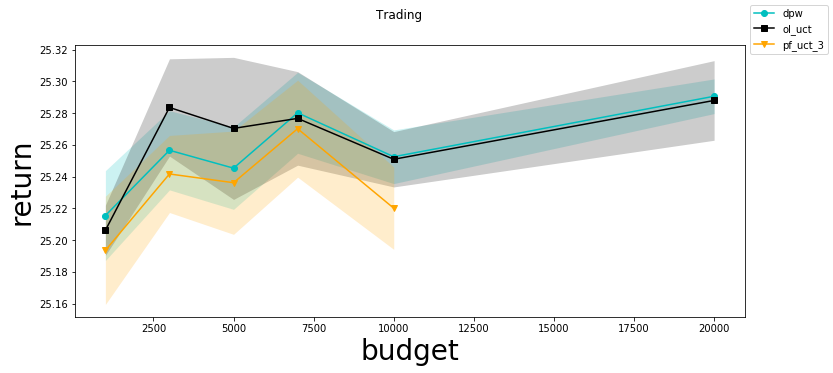

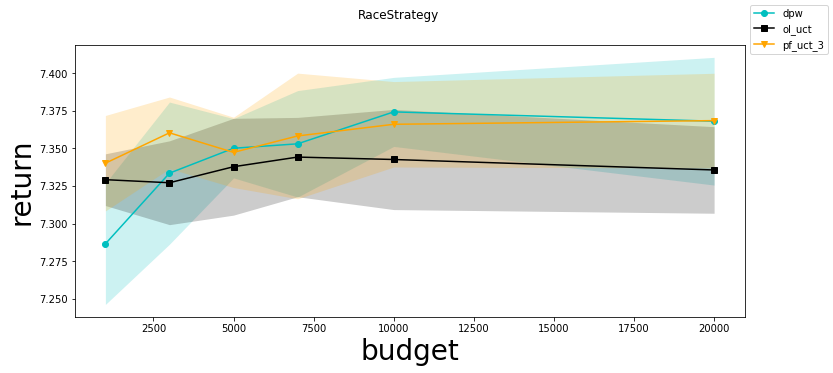

In [3]:
import pickle
envs = ['Trading-v0', 'RaceStrategy',] #'Gridworld','MountainCar'   'RiverSwim-continuous',
budgets = [1000, 3000, 5000, 7000, 10000, 20000]
xs = []
ys = []
settings = ['dpw', 'p_uct', 'pf_uct_3', ]
setting_to_sub = {
    'dpw': '',
    'p_uct': '1_particles/',
    'pf_uct': '1_particles/',
    'pf_uct_2':'1_particles/',
    'pf_uct_3':'1_particles/',
}
setting_to_agent = {
    'dpw': 'dpw',
    'p_uct': '1_pf_mcts_only',
    'pf_uct': '1_pf_mcts_only',
    'pf_uct_2': '1_pf_mcts_only',
    'pf_uct_3': '1_pf_mcts_only'
}
setting_to_label = {
    'dpw': 'dpw',
    'p_uct': 'ol_uct',
    'pf_uct': 'pf_uct',
    'pf_uct_2': 'pf_uct_2',
    'pf_uct_3': 'pf_uct_3'
}
env_to_sub = {
    'RaceStrategy':'',
    'RiverSwim-continuous':'',
    'Trading-v0':'',
    'Gridworld':'',
    'Cliff':'',
    'MountainCar':'',
    'Cartpole':'',
}
env_to_label = {
    'RaceStrategy':'RaceStrategy',
    'RiverSwim-continuous':'Riverswim',
    'Trading-v0':'Trading',
    'Gridworld':'Gridworld',
    'Cliff':'Cliff',
    'MountainCar':'MountainCar',
    'Cartpole':'Cartpole',
}
for e, env in enumerate(envs):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    sub_env = env_to_sub[env]
    env_label = env_to_label[env]
    fig.suptitle(env_label)
#     fig.suptitle(env_label)
    for i,setting in enumerate(settings):
        xs = []
        ys = []
        errors = []
        sub = setting_to_sub[setting]
        agent = setting_to_agent[setting]
        for budget in budgets:
            path = "../logs/hyperopt/{}/{}{}/{}/*/results.pickle".format(env,sub_env, setting, str(budget))
            paths = glob.glob(path)
            if len(paths) == 0:
                print("No path found " + setting + "-" + str(budget))
                print(path)
                continue
            results = []
            for p in paths:
                with open(p, 'rb') as f:
                    results += pickle.load(f)
            res = [x[1] for x in results]
#             print("Setting: " + setting + " Budget:" + str(budget))
#             print(res)
#             print([x[2] for x in results])
#             continue
            best = np.argmax(res)
            best_params, best_mean, best_std, best_n = results[best]
            if env in ['MountainCar']:
                try:
                    print("Setting: " + setting + " Budget:" + str(budget))
                    print("Alpha:", best_params['alpha'])
                    print("c:", best_params['c'])
                except:
                    pass
            xs.append(budget)
            ys.append(best_mean)
            errors.append(best_std / np.sqrt(best_n))
#             print("Setting: " + setting + " Budget:" + str(budget) + " Mean:" + str(ys[-1])[:5] + 
#                   " std:" + str(best_std)[:5] + " error:" + str(errors[-1])[:5] + 
#                   " samples:" + str(best_n))

        xs = np.array(xs)
        ys = np.array(ys)
        errors = np.array(errors)
        ax.plot(xs, ys, label=setting_to_label[setting], color=col[i], marker=markers[i] )
        ax.fill_between(xs, ys - 2 * errors, ys + 2 * errors, alpha=0.2, color=col[i], linewidth=0.)
    ax.set_xlabel('budget', fontsize=AXIS_FONT_SIZE)
    ax.set_ylabel('return', fontsize=AXIS_FONT_SIZE)
    fig.legend()

Setting: dpw Budget:1000 Mean:0.83 std:0.32 error:0.04 samples:50 alpha:0.3
Setting: dpw Budget:3000 Mean:0.70 std:0.43 error:0.06 samples:50 alpha:0.64
Setting: dpw Budget:5000 Mean:0.86 std:0.26 error:0.03 samples:50 alpha:0.09
Setting: dpw Budget:7000 Mean:0.75 std:0.41 error:0.04 samples:100 alpha:0.73
Setting: dpw Budget:10000 Mean:0.74 std:0.42 error:0.04 samples:100 alpha:0.11
Setting: p_uct Budget:1000 Mean:0.69 std:0.45 error:0.06 samples:50 alpha:1.0
Setting: p_uct Budget:3000 Mean:0.75 std:0.39 error:0.05 samples:50 alpha:1.0
Setting: p_uct Budget:5000 Mean:0.65 std:0.47 error:0.06 samples:50 alpha:1.0
Setting: p_uct Budget:7000 Mean:0.77 std:0.39 error:0.03 samples:100 alpha:1.0
Setting: p_uct Budget:10000 Mean:0.70 std:0.44 error:0.04 samples:100 alpha:1.0
Setting: pf_uct Budget:1000 Mean:0.75 std:0.39 error:0.05 samples:50 alpha:0.690
Setting: pf_uct Budget:3000 Mean:0.78 std:0.38 error:0.05 samples:50 alpha:0.26
Setting: pf_uct Budget:5000 Mean:0.66 std:0.46 error:0.06 s

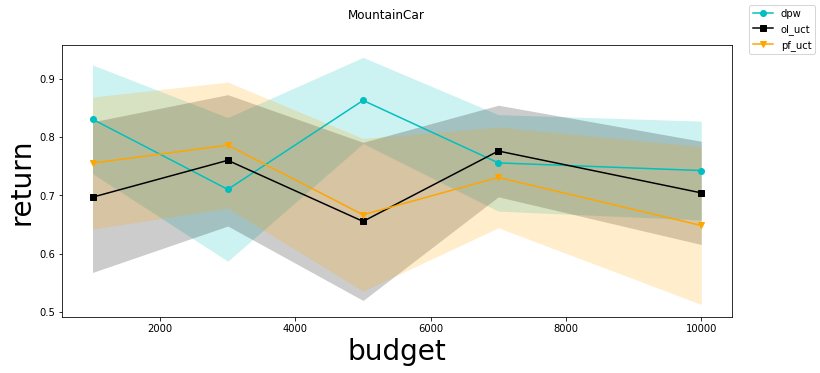

In [24]:
envs = ['MountainCar'] #'Gridworld', 'Trading-v0', 'RaceStrategy', 'RiverSwim-continuous', 
budgets = [1000, 3000, 5000, 7000, 10000]
xs = []
ys = []
settings = ['dpw', 'p_uct', 'pf_uct', ]
setting_to_sub = {
    'dpw': '',
    'p_uct': '1_particles/',
    'pf_uct': '1_particles/',
    'pf_uct_2':'1_particles/',
}
setting_to_agent = {
    'dpw': 'dpw',
    'p_uct': '1_pf_mcts_only',
    'pf_uct': '1_pf_mcts_only',
    'pf_uct_2': '1_pf_mcts_only'
}
setting_to_label = {
    'dpw': 'dpw',
    'p_uct': 'ol_uct',
    'pf_uct': 'pf_uct',
    'pf_uct_2': 'pf_uct_2'
}

env_to_sub = {
    'RaceStrategy':'',
    'RiverSwim-continuous':'fail_0.1/',
    'Trading-v0':'',
    'Gridworld':'',
    'Cliff':'',
    'MountainCar':'',
    'Cartpole':'',
}
env_to_label = {
    'RaceStrategy':'RaceStrategy',
    'RiverSwim-continuous':'Riverswim',
    'Trading-v0':'Trading',
    'Gridworld':'Gridworld',
    'Cliff':'Cliff',
    'MountainCar':'MountainCar',
    'Cartpole':'Cartpole',
}
for e, env in enumerate(envs):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    sub_env = env_to_sub[env]
    env_label = env_to_label[env]
    fig.suptitle(env_label)
#     fig.suptitle(env_label)
    for i,setting in enumerate(settings):
        xs = []
        ys = []
        errors = []
        sub = setting_to_sub[setting]
        agent = setting_to_agent[setting]
        for budget in budgets:
            path = "../logs/tuned_exp/{}/{}{}/{}/*/data.csv".format(env,sub_env, setting, str(budget))
            paths = glob.glob(path)
            data = []
            if len(paths) == 0:
                #print("No path found " + setting + "-" + str(budget))
                continue
            for p in paths:
                df = pd.read_csv(p)
                data += df['total_reward'].to_numpy().tolist()
            data = np.array(data)
            xs.append(budget)
            ys.append(np.mean(data))
            errors.append(np.std(data) / np.sqrt(data.shape[0]))
            
            path = "../logs/hyperopt/{}/{}{}/{}/*/results.pickle".format(env,sub_env, setting, str(budget))
            paths = glob.glob(path)
            if len(paths) == 0:
                print("No path found " + setting + "-" + str(budget))
                continue
            results = []
            for p in paths:
                with open(p, 'rb') as f:
                    results += pickle.load(f)
            res = [x[1] for x in results]
            
            best = np.argmax(res)
            best_params, best_mean, best_std, best_n = results[best]
            try:
                alpha = best_params['alpha']
            except:
                alpha = 1.
            print("Setting: " + setting + " Budget:" + str(budget) + " Mean:" + str(ys[-1])[:4] + 
                  " std:" + str(np.std(data))[:4] + " error:" + str(errors[-1])[:4] + 
                  " samples:" + str(data.shape[0]) + " alpha:" + str(alpha)[:5])

        xs = np.array(xs)
        ys = np.array(ys)
        errors = np.array(errors)
        ax.plot(xs, ys, label=setting_to_label[setting], color=col[i], marker=markers[i] )
        ax.fill_between(xs, ys - 2 * errors, ys + 2 * errors, alpha=0.2, color=col[i], linewidth=0.)
    ax.set_xlabel('budget', fontsize=AXIS_FONT_SIZE)
    ax.set_ylabel('return', fontsize=AXIS_FONT_SIZE)
    fig.legend()